### Netflix Data Analysis.

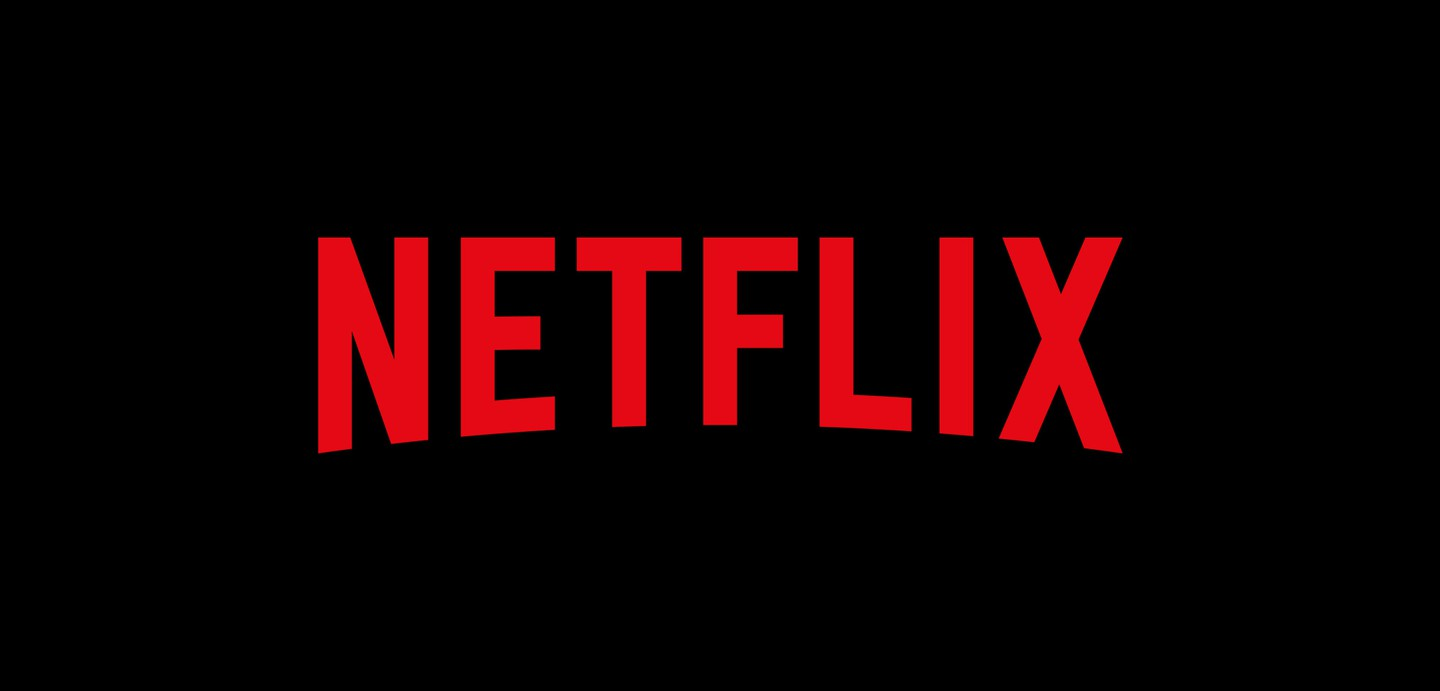

In [28]:
### importing required packages.
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
### importing data 
df = pd.read_csv('netflix.csv')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
### checking the shape of dataset.
df.shape
### having 7789 rows and 11 columns.

(7789, 11)

In [9]:
### checking the total volume of dataset.
df.size

85679

In [10]:
### checking the columns.

In [12]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [13]:
### checking the datatype of each columns.
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [14]:
### getting the basic info about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [22]:
### is there any duplicate records in the dataset? if yes then remove the duplicate records.


df[df.duplicated()] ### having 2 duplicate records.

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [24]:
### removing the duplicate records.
df.drop_duplicates(inplace=True)

In [27]:
### is there any null values present in dataset?
### checking for each columns.

df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

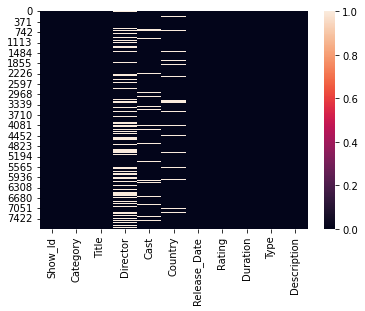

In [30]:
### just for fun lets plot heatmap for null values XD.
sns.heatmap(df.isnull());

In [35]:
### for "House of Cards". what is the show id and write the director of the show?

### using isin()
df[df['Title'].isin(['House of Cards'])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [37]:
### using str.contains()
df[df['Title'].str.contains('House of Cards')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [38]:
### in which year highest number of the tv shows and movies were released? show with bargraph.

### creating the new column for with proper date format for this using to_datetime().
df['New_Date'] = pd.to_datetime(df['Release_Date'])

In [42]:
### dt.year
df['New_Date'].dt.year.value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: New_Date, dtype: int64

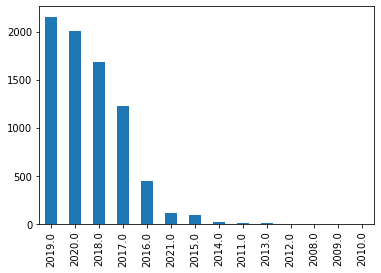

In [44]:
### Bar Graph
 df['New_Date'].dt.year.value_counts().plot(kind='bar');

In [60]:
### how many movies and tv shows are in the dataset?

### using groupby()
df.groupby('Category').Category.count()

Category
Movie      5377
TV Show    2410
Name: Category, dtype: int64

C:\Users\Abhishek Rewale\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

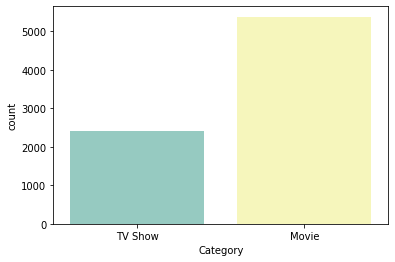

In [62]:
### countPlot
sns.countplot(df['Category'], palette="Set3")

In [66]:
### show all the movies that were relased in year 2000.


### creating new colums as release_year
df['release_year'] = df['New_Date'].dt.year



In [67]:
df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_Date,release_year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,2020.0
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019-03-02,2019.0
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25,2020.0
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020-10-31,2020.0


In [73]:
#### filtering 
mask = (df['Category'] == "Movie") & (df['release_year'] == 2000)
df[mask]

### 0 movies in  year 2000

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_Date,release_year


In [75]:
### show only the Titles of all tv shows were released in india only .
mask = (df['Country'] == "India") & (df['Category'] == 'TV Show')
df[mask]['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

In [78]:
### show the top 10 director who gave the highest number of tv shows and movies.
df['Director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Hakan Algül                8
Name: Director, dtype: int64

In [92]:
### how many movies cast Vicky Kaushal?

#drpping nan values

new_df = df.dropna()

new_df[new_df['Cast'] .str.contains('Vicky Kaushal')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_Date,release_year
3773,s3774,Movie,Love Per Square Foot,Anand Tiwari,"Vicky Kaushal, Angira Dhar, Alankrita Sahai, R...",India,"February 14, 2018",TV-14,133 min,"Comedies, International Movies, Romantic Movies","Individually, bank employees Sanjay and Karina...",2018-02-14,2018.0
3826,s3827,Movie,Lust Stories,"Zoya Akhtar, Karan Johar, Anurag Kashyap, Diba...","Vicky Kaushal, Bhumi Pednekar, Radhika Apte, N...",India,"June 15, 2018",TV-MA,121 min,"Comedies, Dramas, International Movies","In the companion to 2013's ""Bombay Talkies,"" f...",2018-06-15,2018.0
5091,s5091,Movie,Raman Raghav 2.0,Anurag Kashyap,"Nawazuddin Siddiqui, Vicky Kaushal, Sobhita Dh...",India,"November 19, 2020",TV-MA,133 min,"International Movies, Thrillers",A corrupt cop and a serial killer obsessed wit...,2020-11-19,2020.0
5378,s5378,Movie,Sanju,Rajkumar Hirani,"Ranbir Kapoor, Vicky Kaushal, Paresh Rawal, So...",India,"October 15, 2018",TV-MA,159 min,"Dramas, International Movies",From the depths of addiction to the heights of...,2018-10-15,2018.0
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019-03-02,2019.0


In [93]:
### what are differnt rating by netflix?

df["Rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [94]:
df["Rating"].nunique()

14

In [96]:
### how many movies got "TV-14" in "Canada"
mask = (df['Category'] == "Movie") & (df['Rating'] == "TV-14") & (df['Country'] == "Canada") 
df[mask]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_Date,release_year
30,s31,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,"February 5, 2020",TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,2020-02-05,2020.0
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,"April 10, 2019",TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019-04-10,2019.0
608,s609,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,"December 27, 2018",TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...,2018-12-27,2018.0
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,"July 1, 2018",TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...,2018-07-01,2018.0
3713,s3714,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,"November 12, 2017",TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...,2017-11-12,2017.0
3956,s3957,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,"October 14, 2019",TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...,2019-10-14,2019.0
5336,s5336,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,"August 22, 2017",TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...,2017-08-22,2017.0
5393,s5393,Movie,Sardaar ji,Rohit Jugraj,"Diljit Dosanjh, Neeru Bajwa, Mandy Takhar, Jas...",Canada,"December 1, 2017",TV-14,140 min,"Comedies, International Movies, Music & Musicals",When a palatial wedding venue turns out to be ...,2017-12-01,2017.0
6062,s6062,Movie,The Accountant of Auschwitz,Matthew Shoychet,NaN,Canada,"July 1, 2019",TV-14,78 min,"Documentaries, International Movies","Decades after WWII, a former SS officer stands...",2019-07-01,2019.0
7025,s7024,Movie,The Wrong Babysitter,George Mendeluk,"Daphne Zuniga, Seann Gallagher, Lisa Marie Car...",Canada,"June 18, 2019",TV-14,89 min,Thrillers,A widow searches for her missing teenage daugh...,2019-06-18,2019.0


In [97]:
### how many tv shows got rating R after year 2018.

mask = (df['Category'] == "TV Show") & (df['Rating'] == "R") & (df["release_year"] > 2018)
df[mask]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_Date,release_year
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,"April 25, 2019",R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25,2019.0


In [99]:
### what is maximum duration of tv show/movies?

df["Duration"].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [108]:
### creating the new columns. due to duration colum having the min and season.

df[['Min','Unit']] = df['Duration'].str.split(' ',expand=True)

In [107]:
df.drop(['Minites'],axis=1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_Date,release_year,Unit,Min
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0,Seasons,4
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0,min,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0,min,78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0,min,80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0,min,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19,2020.0,min,99
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019-03-02,2019.0,min,111
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25,2020.0,min,44
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020-10-31,2020.0,Season,1


In [121]:
### which country has top 3 highest number of tv shows.

df_tvshow = df[df['Category'] == "TV Show"]

In [120]:
df_tvshow['Country'].value_counts().head(3)

United States     705
United Kingdom    204
Japan             157
Name: Country, dtype: int64

In [123]:
### sorting

df.sort_values(by="release_year",ascending=False)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,New_Date,release_year,Minites,Unit,Min
5564,s5564,Movie,Sherlock Holmes,Guy Ritchie,"Robert Downey Jr., Jude Law, Rachel McAdams, M...","United States, Germany, United Kingdom, Australia","January 1, 2021",PG-13,128 min,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...,2021-01-01,2021.0,128,min,128
5919,s5919,Movie,Surf's Up,"Ash Brannon, Chris Buck","Shia LaBeouf, Jeff Bridges, Zooey Deschanel, J...",United States,"January 1, 2021",PG,86 min,"Children & Family Movies, Comedies, Sports Movies",This Oscar-nominated animated comedy goes behi...,2021-01-01,2021.0,86,min,86
980,s981,TV Show,Bling Empire,NaN,NaN,NaN,"January 15, 2021",TV-MA,1 Season,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...,2021-01-15,2021.0,1,Season,1
5955,s5955,Movie,Taare Zameen Par,Aamir Khan,"Aamir Khan, Darsheel Safary, Tanay Chheda, Tis...",India,"January 10, 2021",PG,162 min,"Dramas, International Movies",When daydreamer Ishaan is sent to boarding sch...,2021-01-10,2021.0,162,min,162
366,s367,Movie,Al acecho,Francisco D'Eufemia,"Rodrigo de la Serna, Belen Blanco, Walter Jako...",NaN,"January 12, 2021",TV-MA,81 min,"International Movies, Thrillers","Looking for a fresh start, a park ranger gets ...",2021-01-12,2021.0,81,min,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaT,NaN,2,Seasons,2
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaT,NaN,3,Seasons,3
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaT,NaN,4,Seasons,4
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaT,NaN,13,Seasons,13
